In [54]:
import scipy.io
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, integrate
import h5py

data = scipy.io.loadmat('D:\\VAE Experiment\\DEAP\\decoded_eegs_2vae\\decoded_eegs_2vae_sub4_latentdim15.mat')['decoded_eegs']
data = data.T
print(data.shape)
one_data = data


norm_data = h5py.File('D:\\Processed DEAP DATA\\normalize_zscore\\sub4.mat')['zscore_data'][0:32,:]
print(norm_data.shape) 



mat = scipy.io.loadmat('D:/DEAP DATA/s4.mat')['data']
pure = mat[0]



biosemi32 = mne.channels.make_standard_montage('biosemi32')
info = mne.create_info(ch_names=biosemi32.ch_names, ch_types='eeg', sfreq=128)
raw = mne.EvokedArray(norm_data, info) 



print(norm_data.shape)
print(np.amax(norm_data)) # max value
print(np.amin(norm_data)) # min value


(32, 322560)
(32, 322560)
(32, 322560)
14.241715396996678
-13.716812707635006


Creating RawArray with float64 data, n_channels=32, n_times=322560
    Range : 0 ... 322559 =      0.000 ...  2519.992 secs
Ready.


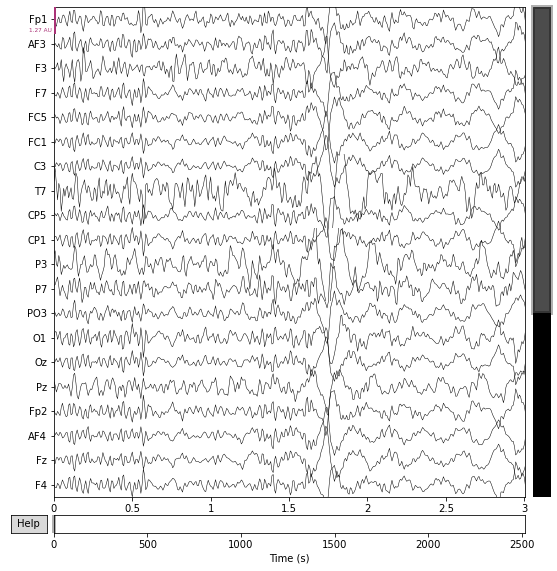

In [55]:
info_ = mne.create_info(ch_names= ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4','F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4','P8','PO4','O2'], sfreq=128)
raw_ = mne.io.RawArray(norm_data, info_, first_samp=0, copy='auto', verbose=None);
raw_.plot(duration=3, n_channels=20);

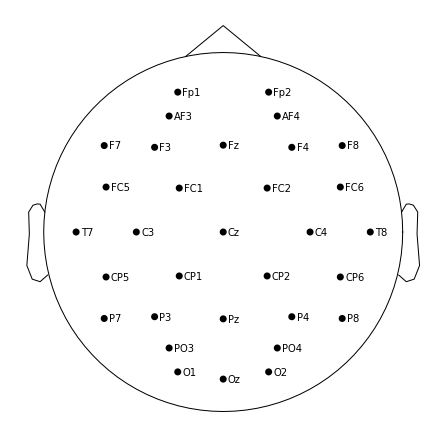

In [56]:
biosemi32.plot(kind='topomap', show_names=True);

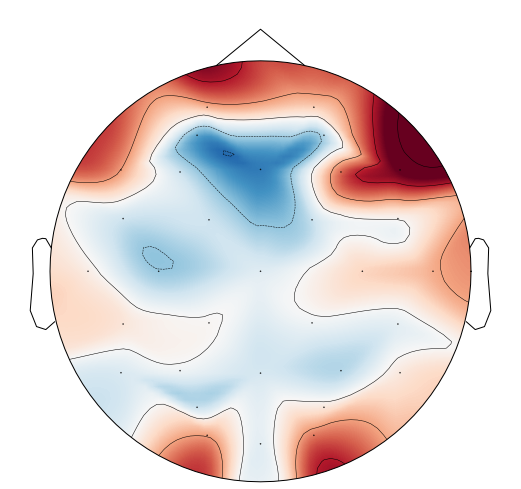

(<matplotlib.image.AxesImage at 0x22aace04580>,
 <matplotlib.contour.QuadContourSet at 0x22aace04a00>)

In [57]:
raw = raw.set_montage(biosemi32)
raw_data_mean = np.mean(raw.data, axis=1)
fig, ax = plt.subplots(figsize=(10, 8))
mne.viz.plot_topomap(raw_data_mean, raw.info, axes=ax, show=True)


In [58]:

raw = raw.set_montage(biosemi32)
mne.viz.plot_topomap(raw.data[:, 0], raw.info, show=False) # time step 0

(<matplotlib.image.AxesImage at 0x22aace70a30>,
 <matplotlib.contour.QuadContourSet at 0x22aace70eb0>)

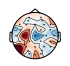

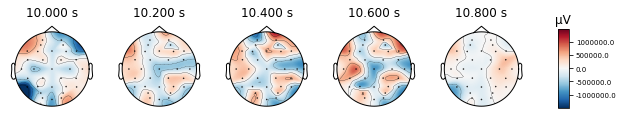

In [59]:
times = np.arange(10.00, 11, .2) # from 30s to 30.2s
raw.plot_topomap(times, ch_type='eeg', time_unit='s', ncols=5, nrows='auto');


In [60]:
print(np.amax(one_data)) # max value
print(np.amin(one_data)) # min value
print(np.amax(norm_data)) # max value
print(np.amin(norm_data)) # min value

13.507556
-13.512095
14.241715396996678
-13.716812707635006


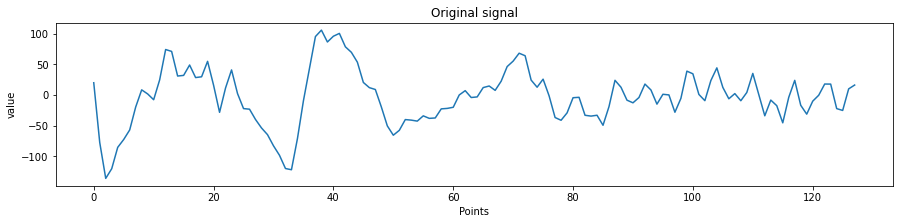

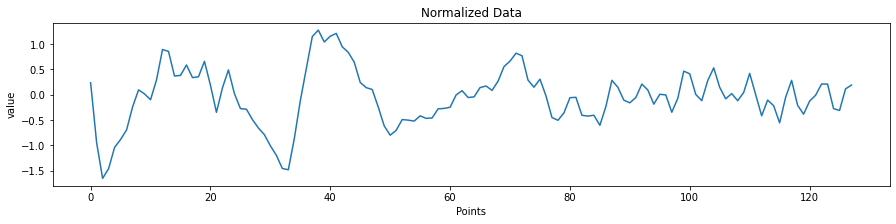

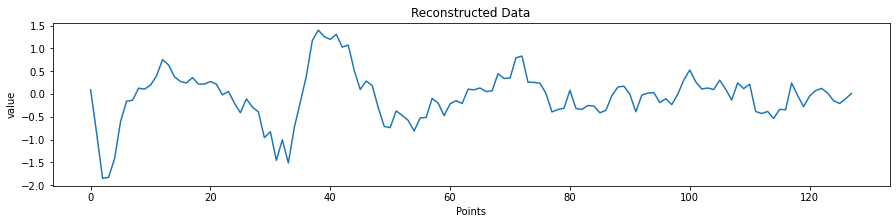

In [61]:
nth = 10

plt.figure(figsize=(15, 3))
plt.plot(pure[0][nth*128:nth*128+128]) # first trial first channel
plt.title("Original signal")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(norm_data[0][nth*128:nth*128+128]) # first trial first channel
plt.title("Normalized Data")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

plt.figure(figsize=(15, 3))
plt.plot(one_data[0][nth*128:nth*128+128])
plt.title("Reconstructed Data")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()




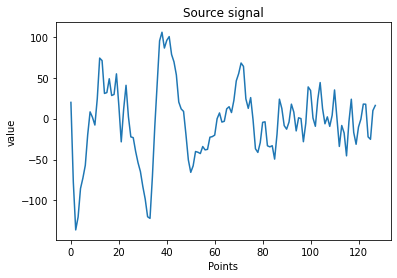

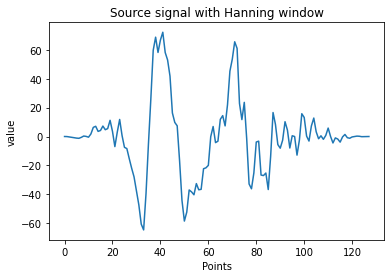

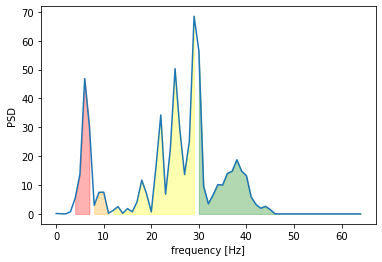

In [62]:
# original 128 points signal (1 second)
plt.plot(pure[0][nth*128:nth*128+128])
plt.title("Source signal")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()
# visualise hanning window
window = np.hanning(128)
# signal with hanning window
plt.plot(pure[0][nth*128:nth*128+128]*window)
plt.title("Source signal with Hanning window")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()


# visualise PSD feature
# theta waves (4–7 Hz), alpha waves (8–13Hz), beta waves (14–30 Hz) and gamma waves (31–50 Hz)
f, Pxx_den = signal.welch(mat[0][0][:128], fs=128, window='hann', nperseg = 128, noverlap=64)
plt.plot(f, Pxx_den)
plt.fill_between(f[4:8], Pxx_den[4:8], alpha = 0.3, color='red')
plt.fill_between(f[8:12], Pxx_den[8:12], alpha = 0.3, color='orange')
plt.fill_between(f[12:30], Pxx_den[12:30], alpha = 0.3, color='yellow')
plt.fill_between(f[30:70], Pxx_den[30:70], alpha = 0.3, color='green')
plt.ylim()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()



In [63]:
import numpy as np
from scipy import signal

# Select a portion of the signal for analysis
f, Pxx_den = signal.welch(mat[0][0][:128], fs=128, window='hann', nperseg = 128, noverlap=64)

# Define frequency ranges for different waves
alpha_range = (8, 12)  
beta_range = (12, 30)  
theta_range = (4, 8)   
delta_range = (0.5, 4)  
gamma_range = (30, 100) 

# Calculate the power in each frequency band
alpha_power = np.sum(Pxx_den[(f >= alpha_range[0]) & (f <= alpha_range[1])])
beta_power = np.sum(Pxx_den[(f >= beta_range[0]) & (f <= beta_range[1])])
theta_power = np.sum(Pxx_den[(f >= theta_range[0]) & (f <= theta_range[1])])
delta_power = np.sum(Pxx_den[(f >= delta_range[0]) & (f <= delta_range[1])])
gamma_power = np.sum(Pxx_den[(f >= gamma_range[0]) & (f <= gamma_range[1])])

# Find the dominant wave based on the highest power
power_values = [alpha_power, beta_power, theta_power, delta_power, gamma_power]
wave_labels = ['Alpha', 'Beta', 'Theta', 'Delta', 'Gamma']
dominant_wave = wave_labels[np.argmax(power_values)]

# Print the dominant wave
print("Dominant Wave original:", dominant_wave)

Dominant Wave original: Beta
